# Assignment 2 (Part 2)

### Assignment Instructions

* **How to install 'otter'**: Run `pip install otter-grader` in your Anaconda Command Prompt
* **Otter**: It is an autograder that we will be using for grading your notebooks.
* **grader.check('qn')**: This command runs test cases for nth question `qn` provided to you and displays the result. But these are not the only test cases, these are provided just for your basic testing. There will be some *hidden test cases* on which your answers will be tested as well.
* You are **not** allowed to edit any pre-defined variables and as per the instructions for every question you have to assign your answers to these variables.
* Write your answers in place of `...`
* You are **not** allowed to use for-loops anywhere in the assignment
* You are **not** allowed to import any other libraries
* Use **only** seaborn or pandas to make plots
* In questions which require storing of answer, if nothing else mentioned use `qKAns` to store the answer where K is question number.

In [1]:
# Initialize Otter
import otter
grader = otter.Notebook()

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

We will explore a dataset, usually used in machine learning to perform classification. It has several demographic features of an adults and a column that shows whether they have an income of atleast 50k. Ofcourse, before performing machine learning we need to visualise clean the dataset and visualise so as to ascertain whether it will give reliable results.

**Question 1** Read the dataset `adults.csv` into the variable `adultsData`. `fnlwgt` is the index column.

In [3]:
#Write your code here
adultsData = pd.read_csv('adults.csv')
adultsData = adultsData.set_index('fnlwgt')
adultsData.head(5)

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
fnlwgt,,,,,,,,,,,,,,
226802.0,25.0,Private,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
89814.0,38.0,Private,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
336951.0,28.0,Local-gov,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
160323.0,44.0,Private,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
103497.0,18.0,NaN,Some-college,10.0,Never-married,NaN,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K


In [4]:
grader.check('q1')

results: All test cases passed!

**Question 2** Convert all numerical columns, including the index, into the `int` datatype. 

In [5]:
#Write your code here

adultsData = adultsData.astype('int', errors = 'ignore')


In [6]:
grader.check('q2')

results: All test cases passed!

**Question 3** Map the income column to `0` for `<= 50k` and `1` otherwise.  

In [7]:
#Write your code here
adultsData['income'] = adultsData['income'].str.replace("<=50K", '0')
adultsData['income'] = adultsData['income'].str.replace(">50K", '1')
adultsData['income'] = adultsData['income'].astype('int')
adultsData.head(5)

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
fnlwgt,,,,,,,,,,,,,,
226802.0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
89814.0,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
336951.0,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
160323.0,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
103497.0,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0


In [8]:
grader.check('q3')

results: All test cases passed!

**Question 4** Change the name of the column `education-num` to `years of education` and `relationship` to `relationship status`. Replace dashes in the index names with spaces (without hardcoding).

In [9]:
#Write your code here  
adultsData = adultsData.rename(columns = {'educational-num':'years of education', 'relationship':'relationship status'})
adultsData.columns = adultsData.columns.str.replace('-', ' ')


# adultsData.columns

In [10]:
grader.check('q4')

results: All test cases passed!

**Question 5** Convert all the string columns into the `string` datatype. 

In [11]:
#Write your code here
# type = adultsData.dtypes

obj_columns = adultsData.select_dtypes(include = ['object']).columns.tolist()
adultsData[obj_columns] = adultsData[obj_columns].astype('string')

# print("    \n ", adultsData.dtypes)
adultsData.head(5)


,age,workclass,education,years of education,marital status,occupation,relationship status,race,gender,capital gain,capital loss,hours per week,native country,income
fnlwgt,,,,,,,,,,,,,,
226802.0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
89814.0,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
336951.0,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
160323.0,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
103497.0,18,<NA>,Some-college,10,Never-married,<NA>,Own-child,White,Female,0,0,30,United-States,0


In [12]:
grader.check('q5')

results: All test cases passed!

**Question 6** Write a function `dashToSpace` that receives an entire column of a dataframe and returns a copy of the column with dashes replaced dashes with spaces.

In [13]:
#Write your code here
def dashToSpace (column):
    # column = [word.replace("-", " ") for word in column]
    column = column.str.replace( '-',   ' ')
    return column


In [14]:
grader.check('q6')

results: All test cases passed!

**Question 7** Use the function `dashtoSpace` inplace on `adultsData`. 

In [15]:
# #Write your code here
# print(type(adultsData))
columnName = adultsData.columns.tolist()
columnData = adultsData.dtypes.tolist()

stringColumns = adultsData.select_dtypes(include = ['string']).columns.tolist() #all series with string values. 
adultsData[stringColumns] = adultsData[stringColumns].apply(dashToSpace)

adultsData.head(5)   
# print(adultsData)
    

,age,workclass,education,years of education,marital status,occupation,relationship status,race,gender,capital gain,capital loss,hours per week,native country,income
fnlwgt,,,,,,,,,,,,,,
226802.0,25,Private,11th,7,Never married,Machine op inspct,Own child,Black,Male,0,0,40,United States,0
89814.0,38,Private,HS grad,9,Married civ spouse,Farming fishing,Husband,White,Male,0,0,50,United States,0
336951.0,28,Local gov,Assoc acdm,12,Married civ spouse,Protective serv,Husband,White,Male,0,0,40,United States,1
160323.0,44,Private,Some college,10,Married civ spouse,Machine op inspct,Husband,Black,Male,7688,0,40,United States,1
103497.0,18,<NA>,Some college,10,Never married,<NA>,Own child,White,Female,0,0,30,United States,0


In [16]:
grader.check('q7')

results: All test cases passed!

**Question 8** There are 4 types of data: `Nominal`, `Ordinal`, `Discrete`, `Continous`. Make a series of datatype `string` that shows that type of data in each column in the order that the column is present in the data. Assign the answer to `q8Ans`.

In [17]:
#Write your code here
indexDatatype = adultsData.columns.tolist() #column names as a list. 
datatypes = [ 'Discrete', 'Nominal', 'Nominal', 'Discrete','Ordinal', 'Nominal', 'Nominal', 'Nominal', 'Nominal', 'Continous', 'Continous', 'Discrete', 'Nominal', 'Ordinal' ]
q8Ans = pd.Series(datatypes, index = indexDatatype, dtype='string')



In [18]:
grader.check('q8')

results: All test cases passed!

**Question 9** Just as you defined a function above to replace dots with dashes in each column and then applied it on each column. Make another function `unique` to find the the number of unique values of each column. 

In [19]:
#Write your code here
def unique(column): 
    return column.nunique(dropna=False)

q9Ans = pd.Series(adultsData.apply(unique))


In [20]:
grader.check('q9')

results: All test cases passed!

**Question 10** Visualize the number of missing values for only the columns with missing values. 

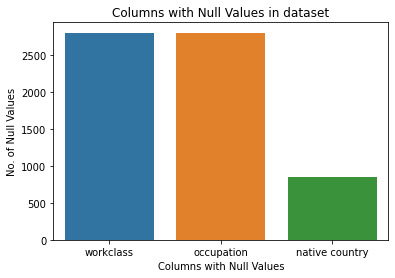

In [21]:
#Write your code here
nullValues = pd.Series(adultsData.isna().sum())
q10Ans = nullValues[ nullValues != 0] 
# print(nullValues)
# print(q10Ans)
nullValuesIndex = q10Ans.index
nullValuesColumn = q10Ans.values
# print(type(nullValuesColumn), type(nullValuesIndex))

#create a bar plot for visualizaton 
data = pd.DataFrame({'null Values': nullValuesIndex, 'Number of Null values':nullValuesColumn })
sns.barplot(data, x ='null Values' ,y = 'Number of Null values')
plt.xlabel("Columns with Null Values")
plt.ylabel("No. of Null Values")
plt.title("Columns with Null Values in dataset")
plt.show()

**Question 11** In this question we will deal with null values. Replace the null values in each column with the non-null categorical mode of the column with the years of education. What that means is for each unique value of `years of education` find the mode of column's non-null rows. See me in my office hours if you don't understand this. Use loops if you wish.

In [22]:
#Write your code here
nullVal = adultsData.columns[adultsData.isna().any()]
nullVal = nullVal.tolist()
final = []


for i in nullVal: #for each column. 
    null = adultsData[adultsData[i].isnull()]
    nNull = adultsData[~adultsData[i].isnull()] #everything but null.
    indexNull = null.index.values.tolist()
    temp = []
    for j in range(len(indexNull)):
        yoe = nNull[nNull['years of education'] == null.iloc[j]['years of education']]
        data = np.array(yoe[i])
        v,c = np.unique(data, return_counts=True)
        mode = np.max(c)
        m = list((np.argwhere(c == mode)).flatten())
        modeFinal = str(v[m][0])
        temp.append(modeFinal)
        break
    final.append(temp)

**Question 12** Combine `capital gain` and `capital loss` columns into `capital profit`. Insert `capital profit` into `adultsData` right before `income`.

In [23]:
# Write your code here

gain = adultsData['capital gain']
loss = adultsData['capital loss']
adultsData = adultsData.drop('capital gain', axis=1)
adultsData = adultsData.drop('capital loss', axis=1)

profit  = pd.Series(gain.subtract(loss))
adultsData.insert(11, "capital profit", profit)
# print(profit)

adultsData.head(5)

,age,workclass,education,years of education,marital status,occupation,relationship status,race,gender,hours per week,native country,capital profit,income
fnlwgt,,,,,,,,,,,,,
226802.0,25,Private,11th,7,Never married,Machine op inspct,Own child,Black,Male,40,United States,0,0
89814.0,38,Private,HS grad,9,Married civ spouse,Farming fishing,Husband,White,Male,50,United States,0,0
336951.0,28,Local gov,Assoc acdm,12,Married civ spouse,Protective serv,Husband,White,Male,40,United States,0,1
160323.0,44,Private,Some college,10,Married civ spouse,Machine op inspct,Husband,Black,Male,40,United States,7688,1
103497.0,18,<NA>,Some college,10,Never married,<NA>,Own child,White,Female,30,United States,0,0


In [24]:
grader.check('q12')

results: All test cases passed!

**Question 13** Display a colored correlation heatmap of the appropriate dimensions for all numerical columns.

<AxesSubplot:>

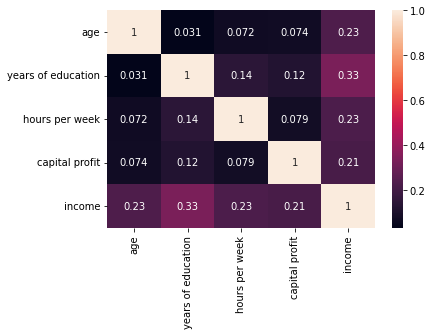

In [25]:
#Write your code here
sns.heatmap(adultsData.corr(), annot = True)


**Question 14** Describe what the heatmap shows. 

The heatmap above shows how much each numerical value is correlated to the other numerical values. For example, the correlation of age with age is 1 (which is the maximum possible correlation) since all the values for both will be completely same. 


We can see that all values through the diagonal are 1, since they are correlation of variables with themselves. 
Secondly, the darker the color of a box, the less is the correlation between the two variables it has on its x and y variables. 


**Question 15** Make pivot table of years of education and proportion of people with the both incomes. Visualise it and explain the trend you see in the plot. 

In [26]:
#Write your code and answer here

# adultsData.pivot(index='years of education', columns='income')
pivotTable = adultsData.pivot_table(
    index = 'years of education',
    columns = 'income', 
    values='age',
    aggfunc=np.sum,
)
pivotTable.head()

income,0,1
years of education,,
1,3442,61
2,11105,415
3,20885,1300
4,43975,3322
5,28897,2025


**Trend of pivotTable above:**

1. Generally, as compared to people with relatively less education, people with more education have higher income (>50K)
2. People with more years of education are higher in number in the dataset as compared to people with less years of education. 
3. People with 4 years of education have the highest number of people in the higher income bracket (>50K)
4. The dataset is not balanced with respect to years of education. It is not balanced with respect to the income levels either.


**Question 16** Draw suitable plots that show distribution of the average of the income column with all numerical columns. Use loops here.

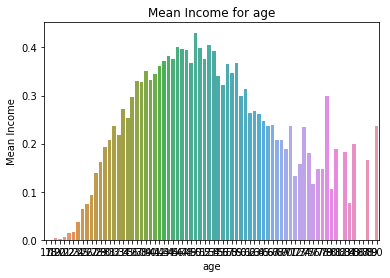

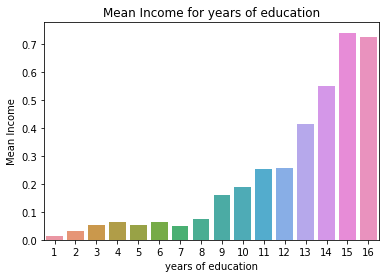

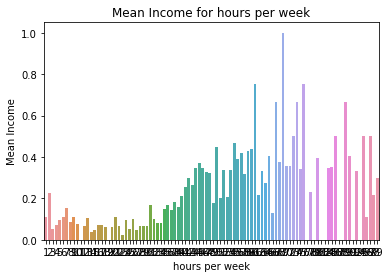

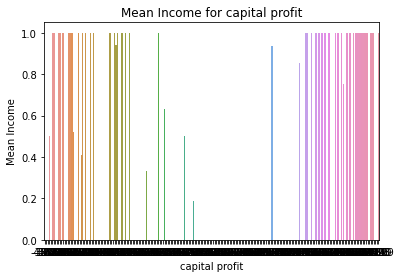

In [27]:
#Write your code here
#income wrt each numerical column. 
numColumns = adultsData.select_dtypes(include='int')
numColumns = numColumns.drop(['income'], axis=1)

uniqueVals = [numColumns[i].unique() for i in numColumns] #unique values for all numerical columns. 

#mean of income on all unique values. 
meanIncome = []
tempI = 0

for i in numColumns.columns: # for each column of numColumn, finds its mean income.  
    tempIncome = [adultsData.loc[numColumns[i] == uniqueVals[tempI][j], ['income']].mean() for j in range(len(uniqueVals[tempI]))]   #mean for unique values of each column.    
    tempI = tempI+1
    meanIncome.append(np.array(tempIncome).flatten())
    
    
#plotting. 
for i in range(len(uniqueVals)):
    # plt.figure(figsize=(100,50))
    data = pd.DataFrame({'numColumns': uniqueVals[i],"Mean Income": meanIncome[i]}) #dataframe. 
    sns.barplot(data, x = 'numColumns' ,y = 'Mean Income')
    plt.xlabel(numColumns.columns[i]) #get name of columns.
    plt.ylabel("Mean Income")
    plt.title("Mean Income for "+ str(numColumns.columns[i]))
    plt.show()
    



**Question 17** Draw all scatterplots such that there are unique values of a numerical column on the x-axis and the corresponding mean value of the other numerical column on the y-axis.

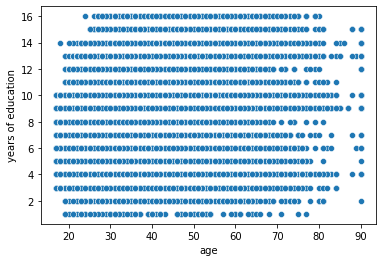

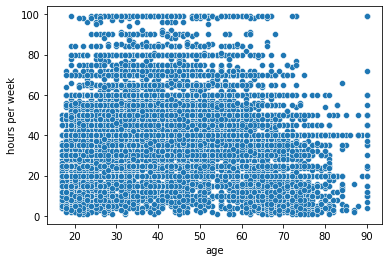

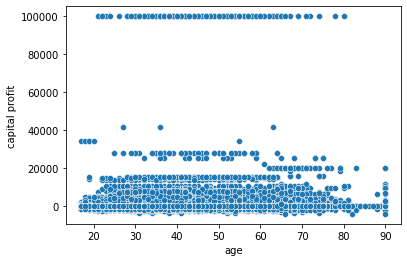

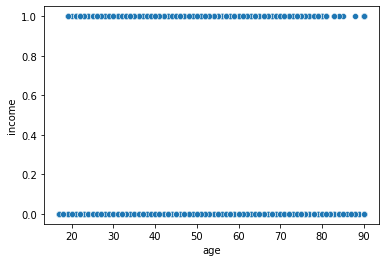

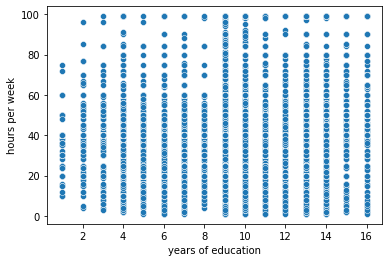

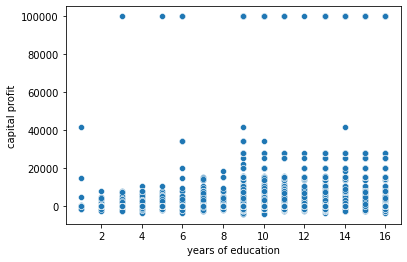

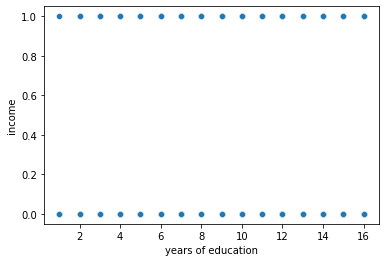

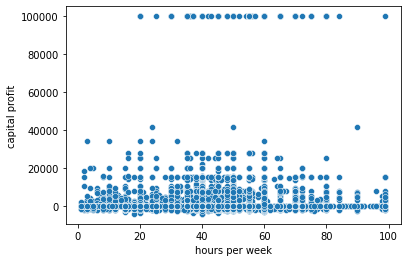

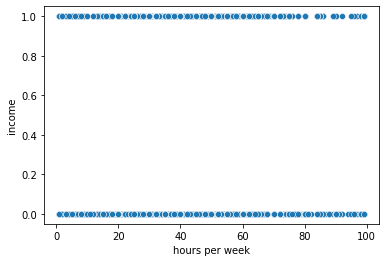

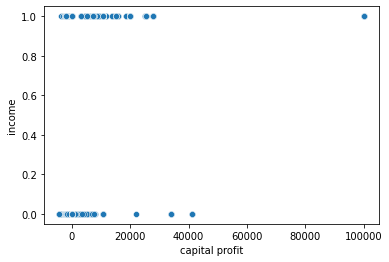

In [28]:
#Write your code here

numColumnsInt = adultsData.select_dtypes(include='int')
uniqueValsInt = [numColumnsInt[i].unique() for i in numColumnsInt] #unique values for ALL numerical columns. 
s = numColumnsInt.columns.size
# mean of all numerical values on one value.  
meanNum = []
tempCount  = 0
for i in range(s): 
    # splat = [sns.scatterplot(data = numColumnsInt, x = numColumnsInt.columns[i], y = numColumnsInt.columns[j]) for j in range(i,s) if i != j]
    # for i in range(len(splat)):
    #     scatter = splat[i]
    #     plt.show()
    for j in range(i, s):
        if(i!= j):
            splt = sns.scatterplot(data = numColumnsInt, x = numColumnsInt.columns[i], y = numColumnsInt.columns[j])
            plt.show()
     



**Question 18** For each age what is the least `hours per day` individuals work. Plot only the least 10.

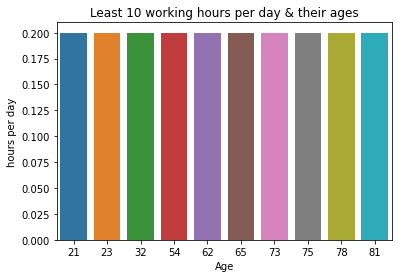

In [29]:
#Write your code here
ages = pd.DataFrame(adultsData['age'] )# vales for age. 
hoursPerDay = adultsData['hours per week']/5 #hours per day for each entry. 
ages.insert(1, 'hours per day', hoursPerDay)
sorted = ages.sort_values(by=["hours per day"])
# print(sorted.head(50))
ageSorted = sorted['age'].head(10)
hoursSorted = sorted['hours per day'].head(10)

data = pd.DataFrame({'age':ageSorted, 'hours': hoursSorted})
sns.barplot(data, x = 'age', y='hours')
plt.xlabel("Age")
plt.ylabel('hours per day')
plt.title("Least 10 working hours per day & their ages")
plt.show()



**Question 19** For each numerical column, use a suitable plot to show the distribution of average of the `income` column. use loops here.

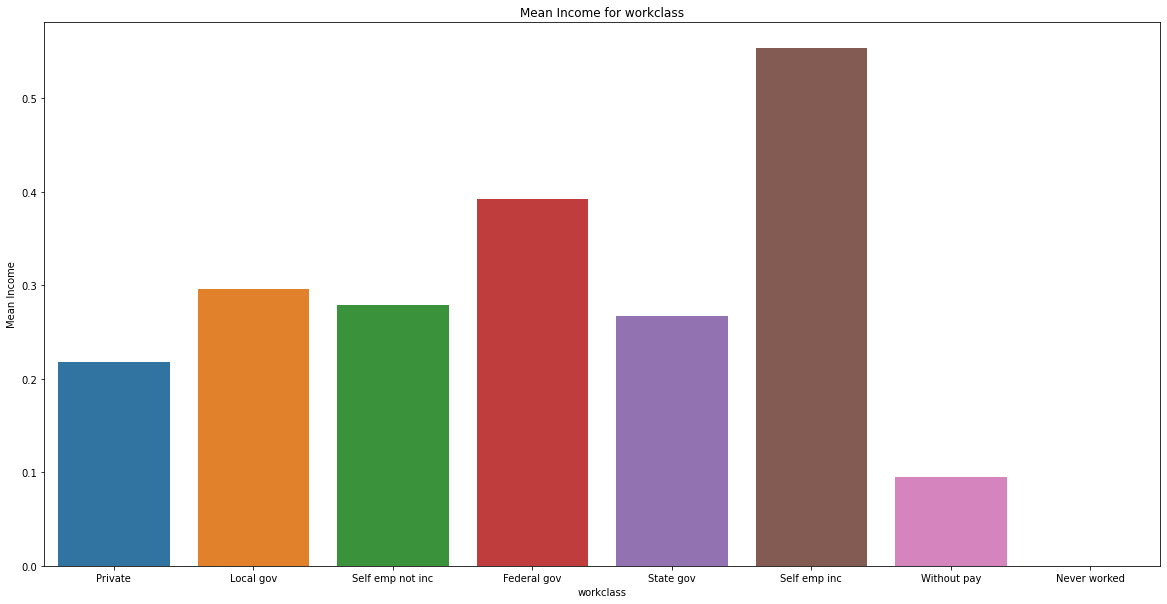

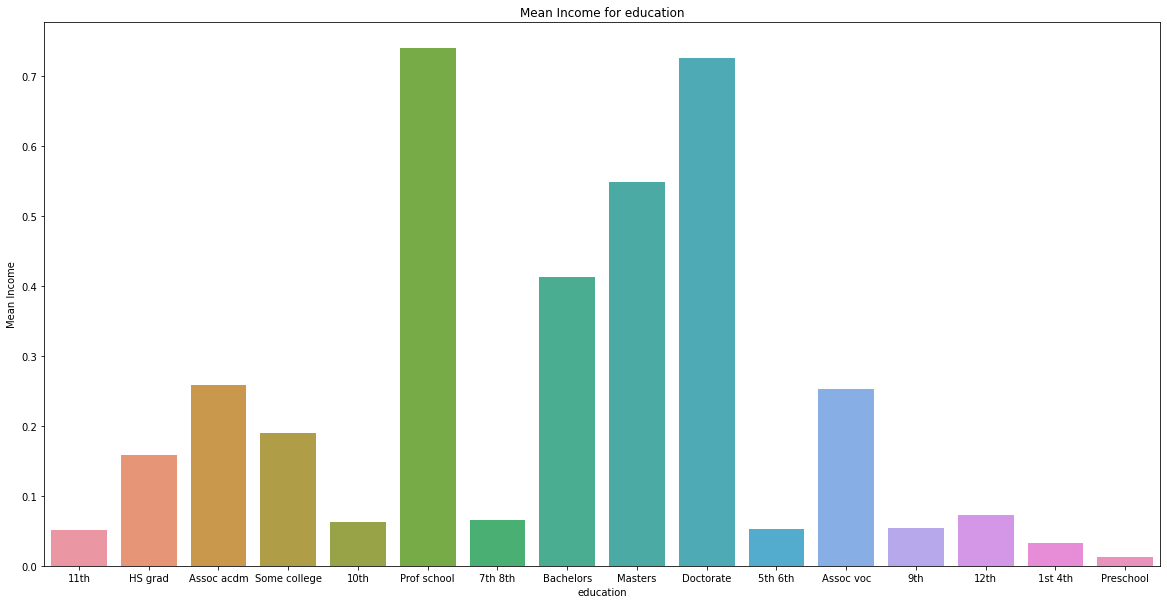

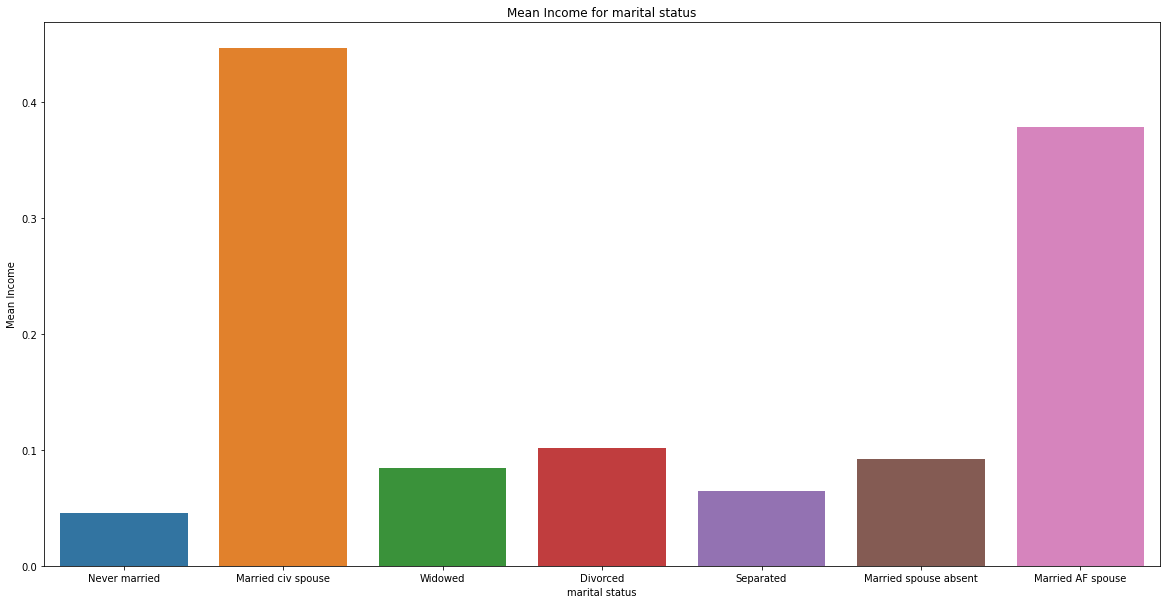

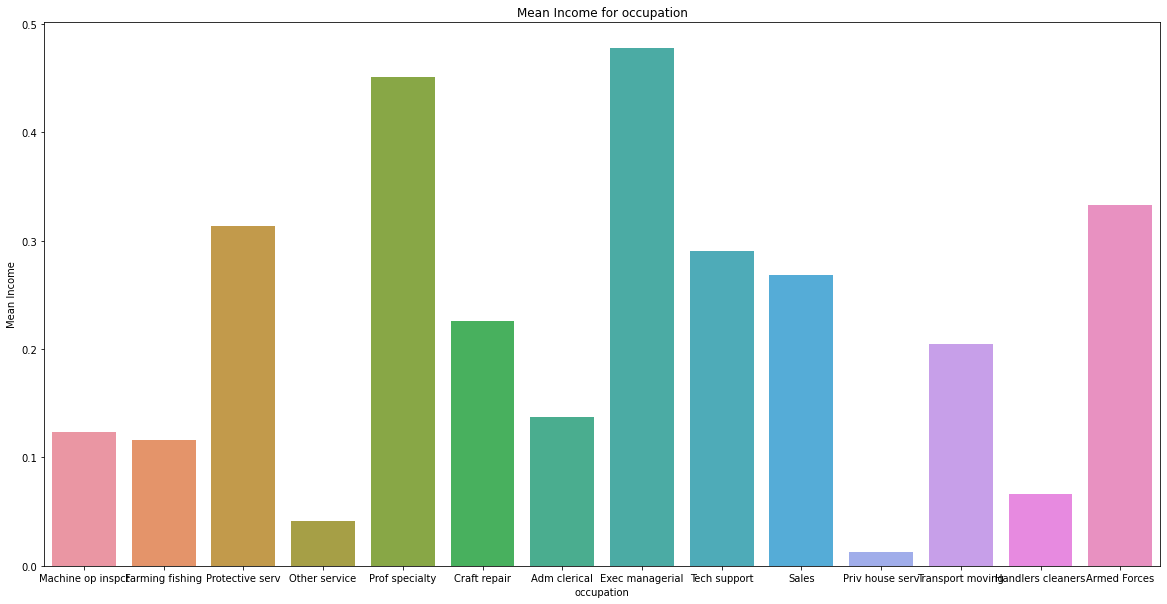

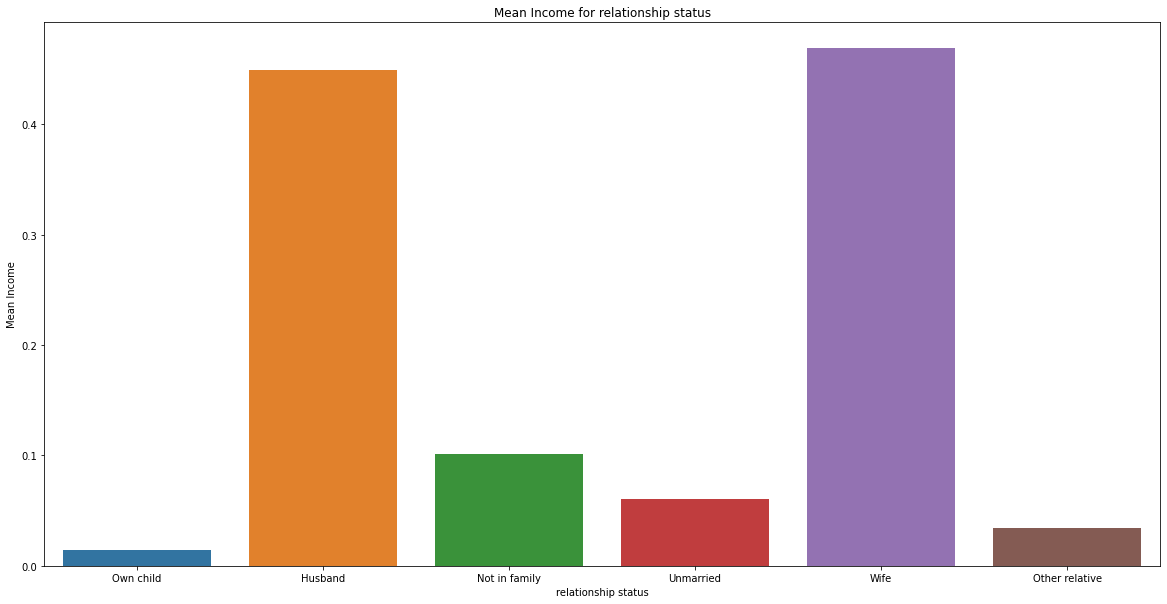

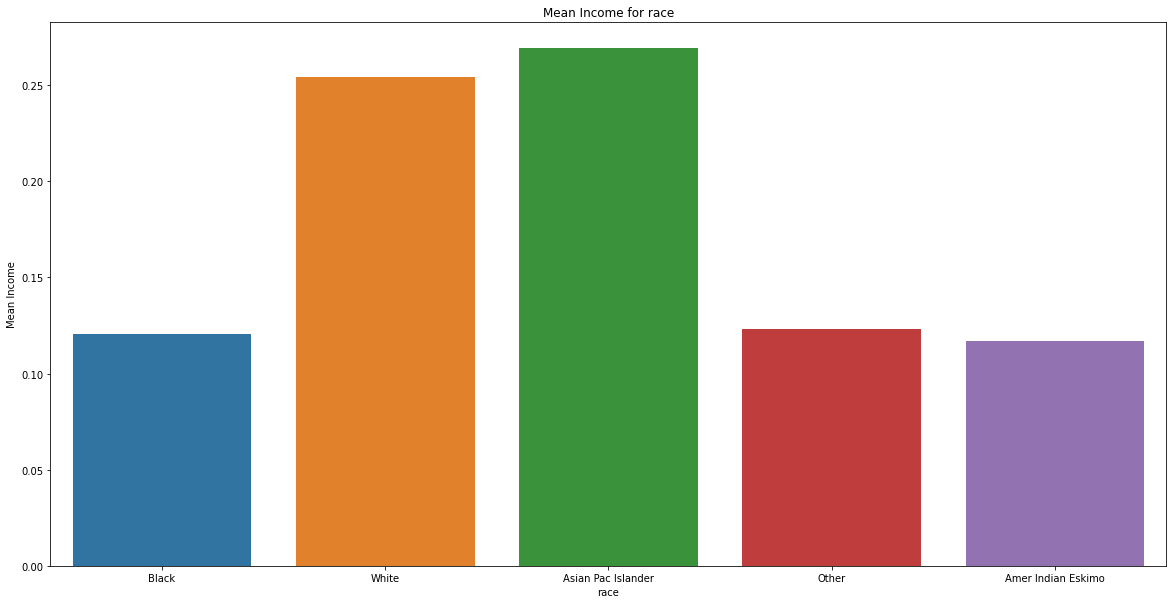

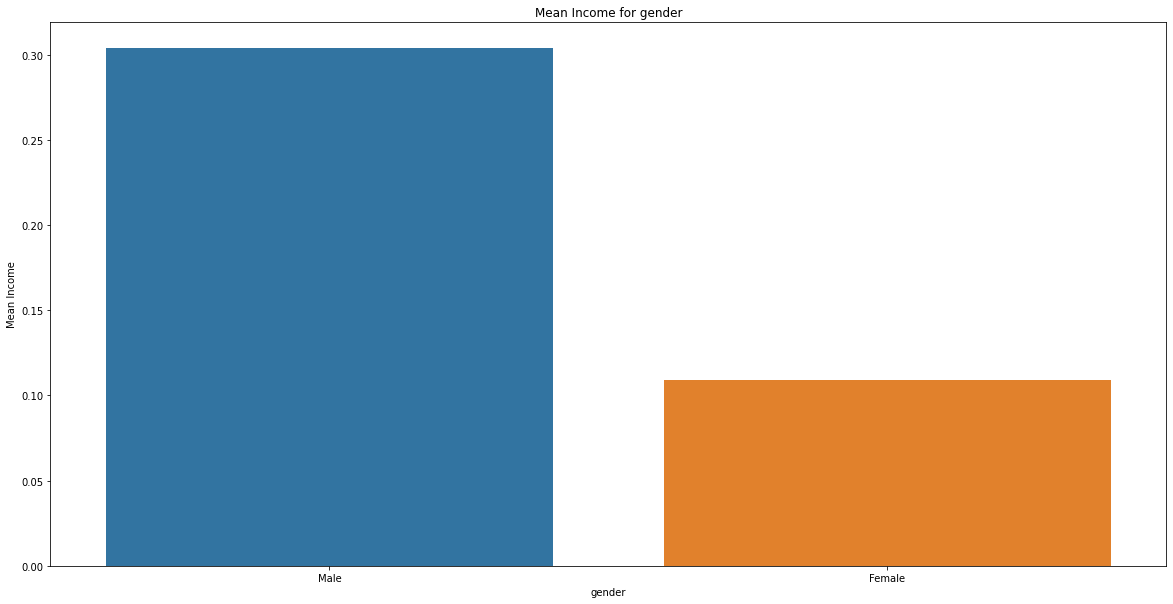

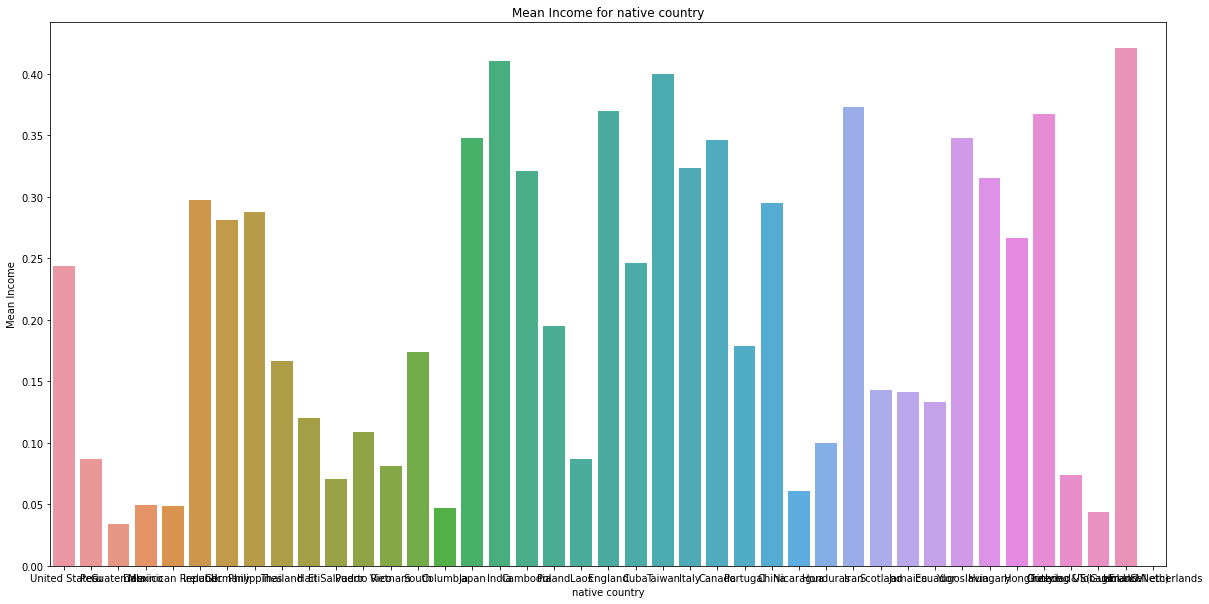

In [43]:
#Write your code here
nonNumColumns = adultsData.select_dtypes(include='string')
# nonNumColumns = nonNumColumns.drop(['income'], axis=1)

uniqueValsNon = [nonNumColumns[i].unique() for i in nonNumColumns] #unique values for all numerical columns. 

#mean of income on all unique values. 
meanIncome = []
tempI = 0

for i in nonNumColumns.columns: # for each column of numColumn, finds its mean income.  
    tempIncome = [adultsData.loc[nonNumColumns[i] == uniqueValsNon[tempI][j], ['income']].mean() for j in range(len(uniqueValsNon[tempI]))]   #mean for unique values of each column.    
    tempI = tempI+1
    meanIncome.append(np.array(tempIncome).flatten())
    
    
#plotting. 
for i in range(len(uniqueValsNon)):
    plt.figure(figsize = (20,10))
    data = pd.DataFrame({'column': uniqueValsNon[i], 'mean': meanIncome[i]})
    sns.barplot(data, x ='column' , y ='mean'  )
    plt.xlabel(nonNumColumns.columns[i]) #get name of columns.
    plt.ylabel("Mean Income")
    plt.title("Mean Income for "+ str(nonNumColumns.columns[i]))
    plt.show()

**Question 20** Describe the relation of each non-numerical column with the income as you see in the above plots. Specifically describe what effect being in a certain category has on the income

The effect of each numerical category is different on income. 
1. Self employed has the highest income. 
2. Similarly, being a male, being a white or asian means there will be higher salary. 


**Question 21** Plot horizontal counts for each category for each non-numerical column. Use loops here.

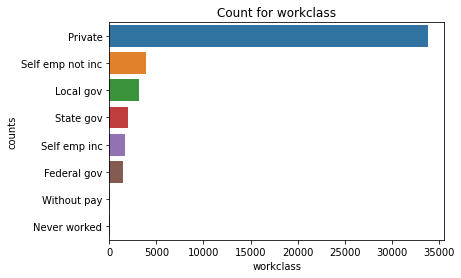

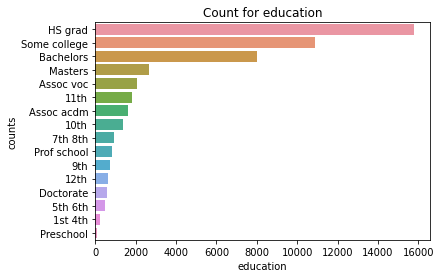

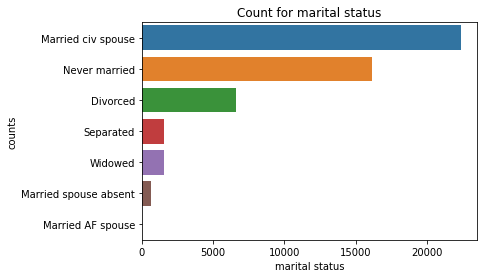

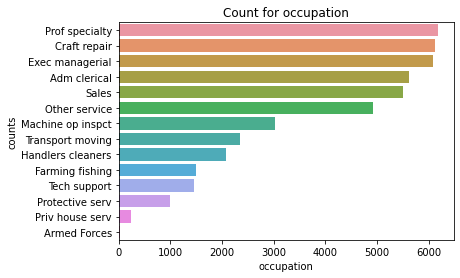

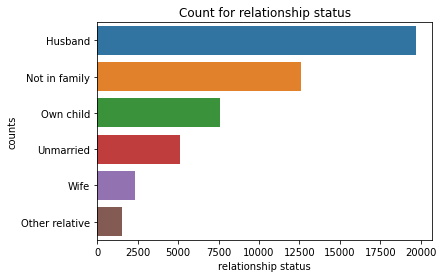

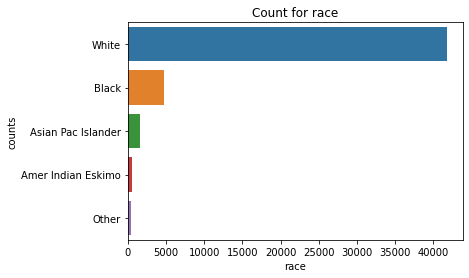

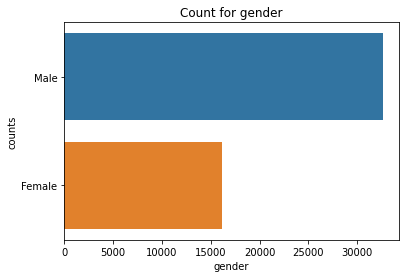

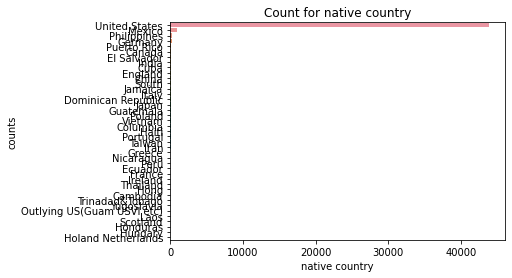

In [31]:
#Write your code here
nonNumColumns = adultsData.select_dtypes(include='string') 
u = [nonNumColumns[i].unique() for i in nonNumColumns]
# tempCounts =[]
totalCounts = []
# tempI = 0
for i in nonNumColumns:
    tempCounts = nonNumColumns[i].value_counts()
    # print(type(tempCounts))
    totalCounts.append(tempCounts)
    
for i in range(len(totalCounts)):
    s = totalCounts[i]
    series = pd.DataFrame({'index': s.index, 'values': s.values })
    sns.barplot(series,x= 'values' , y = 'index', orient='h')
    plt.xlabel(nonNumColumns.columns[i])
    plt.ylabel('counts')
    plt.title('Count for ' + str(nonNumColumns.columns[i]))
    plt.show()


**Question 22** Do the plots above show that we can adequately distinguish incomes based on the data we currently have?

Write your answer here

**Question 23** Make a function `column_describe` that receives `adultsData` and the column name and returns the column description as returned by `adultsData.describe()`.

In [32]:
#Write your code here
def column_describe (data, c): 
    column = data[c]
    mean = np.mean(column)
    count = column.count()
    k = [count,mean, column.std(), column.min(), np.percentile(column, 25), np.percentile(column, 50), np.percentile(column, 75), column.max()]
    a = pd.Series(k, index = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'])
    return a

# print(adultsData.describe()['age'])
print(column_describe(adultsData, 'age'))



count    48842.000000
mean        38.643585
std         13.710510
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
dtype: float64


In [33]:
grader.check('q23')

results: All test cases passed!

**Question 24** Make another function `describe` that receives the dataset and uses the above function to describe the dataframe exactly as adultsData.describe() would do it. Use loops if needed.

In [34]:
#Write your code here
# adultsData.describe()
def describe (dataset):
    cols = dataset.select_dtypes(include='int')
    # print(cols)
    columnName = cols.columns
    # print(columnName)
    finalDescribe  = pd.DataFrame()
    count = 0
    for  i in cols:
        tempSeries = column_describe(dataset, i)
        finalDescribe.insert(count, columnName[count], tempSeries)
        count = count + 1
    return finalDescribe

# print(adultsData.describe())# adultsData.insert(11, "capital profit", profit)
# print(describe(adultsData))

In [35]:
grader.check('q24')

results: All test cases passed!

**Question 25** Manually build (as taught in class) and plot kernel density plots for each of numerical columns. Loops allowed.

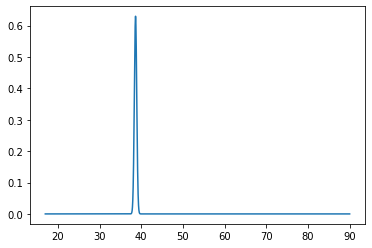

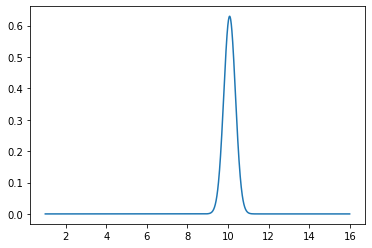

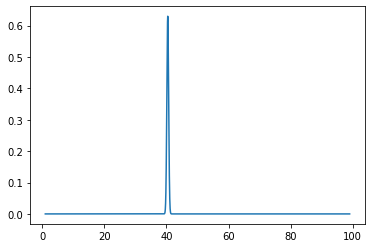

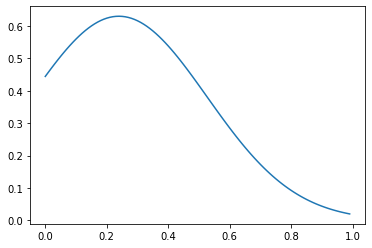

In [37]:
#Write your code here
def kernal(mean, x_min, x_max,s):
    x = np.arange(x_min, x_max, 0.01)
    return 1/np.sqrt(2*np.pi**s**2) * np.exp(- ((x-mean)/(2*s**2))**2)

cols = adultsData.select_dtypes(include='int')
cols = cols.drop('capital profit',axis = 1)
for i in cols:
    x_max = cols[i].max()
    x_min = cols[i].min()
    x = np.arange(x_min, x_max, 0.01)
    mean = cols[i].mean()
    y = kernal(mean, x_min, x_max, 0.45 ) 
    sns.lineplot(x = x,y = y)
    plt.show()
    # print(x_max, x_min)

**Question 26** For each income category compare the distribution of the numerical columns using a suitable plot.

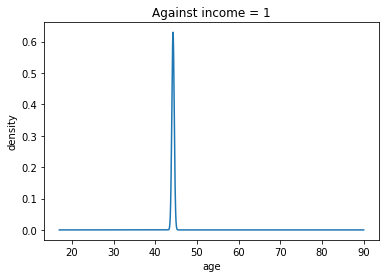

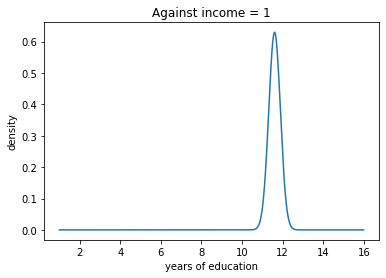

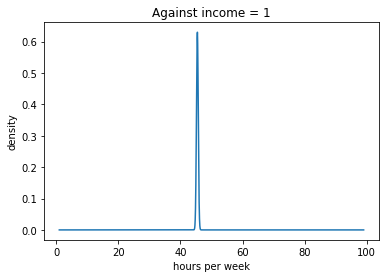

In [47]:
cols = adultsData.select_dtypes(include='int')
cols = cols.drop('capital profit', axis=1)
income0 = cols[cols['income'] == 0]
income1 =cols[cols['income'] == 1]
desc0 = describe(income0)
desc1 = describe(income1)
# cols = cols.drop('income', axis  =1)

for i in cols: 
    if i != 'income':
        mean0 = desc0[i]['mean']
        x_max0 = desc0[i]['max']
        x_min0 = desc0[i]['min']
        mean1 = desc1[i]['mean']
        xmax1 = desc1[i]['mean']
        xmin1 = desc1[i]['mean']
        x = np.arange(x_min0, x_max0, 0.01)
        x1 = np.arange(xmin1, xmax1, 0.01)
        y = kernal(mean1, x_min0, x_max0, 0.45 )
        y1 = kernal(mean1, xmin1, xmax1,0.45)
        kde = sns.lineplot(x = x, y = y).set(title  = 'Against income = 0')
        plt.xlabel(i)
        plt.ylabel("desnity")
        kde = sns.lineplot(x = x1, y = y1).set(title = 'Against income = 1')
        plt.xlabel(i)
        plt.ylabel('density')
        plt.show()
    

In [ ]:
grader.check_all()